### Import Headers

In [1]:
import pickle
import numpy as np
from sklearn.linear_model import LinearRegression
import random
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
import pandas as pd

### Open Training data files and get number of elements

In [2]:

traindata = pd.read_csv("C:\\Users\\Shirfil Mohammed\\Downloads\\train.csv")

trainshape = np.shape(traindata)
nelements = trainshape[0]
parts = 16 

### Partition Test Data into 16 equal parts

In [3]:
def partition_data(data, nelements, parts):

    indices = np.arange(0, nelements, 1)
    finalarr = np.empty([parts, int(nelements/parts), 2])

    for j in range(parts):
        temp = np.empty([int(nelements/parts), 2])
        for i in range(int(nelements/parts)):
            index = random.choice(indices)
            deleteindex = np.where(indices == index)
            temp[i] = data[index]
            indices = np.delete(indices, deleteindex)
        finalarr[j] = temp

    return finalarr

partitioned_data = partition_data(traindata, nelements, parts)

### Function to Train Models for a given degree

In [4]:
def train_models(partitioned_data, parts, degree):
    Models = np.empty([parts], dtype=LinearRegression)
    poly = PolynomialFeatures(degree=degree)
    for i in range(parts):
        X_poly = poly.fit_transform(
            partitioned_data[i][:, 0].reshape(int(nelements/parts), 1))
        Models[i] = (LinearRegression().fit(X_poly, partitioned_data[i][:, 1]))
    return Models

### Open Test Data Files

In [5]:

testdata = pd.read_csv("C:\\Users\\Shirfil Mohammed\\Downloads\\test.csv")
testshape = np.shape(testdata)
ntestelements = testshape[0]

### Train Models and Calculate Bias, Bias^2, Variance, MSE, Irreducible Error

In [6]:
AllModels = np.empty([15, 16], dtype=LinearRegression)

fDash = np.empty([15, 16, 80], dtype=float)
bias = np.empty([15])
variance = np.empty([15])
bias2 = np.empty([15])
mse = np.empty([15])
irrError = np.empty([15])
finalbias = np.empty([15])

for i in range(15):
    AllModels[i] = train_models(partitioned_data, parts, i+1)
    bias = np.empty([parts])
    for j in range(parts):
        poly = PolynomialFeatures(degree=i+1)
        err = AllModels[i, j].predict(
            poly.fit_transform(testdata[:, 0].reshape(ntestelements, 1)))
        fDash[i][j] = err
    bias[i] = 0
    bias2[i] = np.mean(abs(testdata[:, 1] - np.mean(fDash[i], axis=0))**2)
    bias[i] = np.mean(abs(np.mean(fDash[i], axis=0) - testdata[:, 1]))
    variance[i] = np.mean(np.var(fDash[i], axis=0))
    mse[i] = 0
    for x in fDash[i]:
        mse[i] += np.mean((x-testdata[:, 1])**2)
    mse[i] /= 16
    irrError[i] = 0
    irrError[i] = mse[i] - variance[i] - bias2[i]
    finalbias[i] = bias[i]

### Bias-Variance Table

In [7]:
table = pd.DataFrame({
    "Bias": finalbias,
    "Variance": variance,
})
table.to_markdown("bias_variance.md")
table

,Bias,Variance
0,573.604721,29514.857906
1,566.985850,46026.469634
2,48.501923,48148.249667
3,55.480698,58132.272270
4,55.071688,68419.437652
5,54.056937,87656.105508
6,57.894843,103914.560822
7,61.093369,119677.770150
8,61.787569,135432.701291
9,67.230160,143260.208144


### Irreducible Error

In [8]:
table = pd.DataFrame({
    "Irreducible Error": irrError,
})
table.to_markdown("irreducible_error.md")
table

,Irreducible Error
0,-5.820766e-11
1,0.000000e+00
2,-1.455192e-11
3,-1.273293e-11
4,-9.094947e-12
5,-2.728484e-12
6,9.094947e-13
7,-1.182343e-11
8,1.455192e-11
9,3.728928e-11


### Plots

### Bias vs Degree 

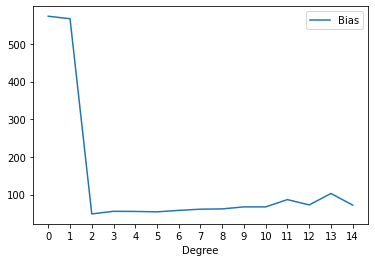

In [9]:
plt.plot(finalbias, label="Bias")
plt.xticks(range(0, 15))
plt.xlabel('Degree')
plt.legend()
plt.show()

### Variance Vs Degree

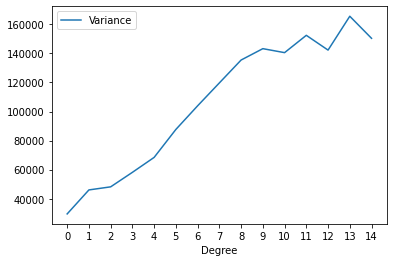

In [10]:
plt.plot(variance, label="Variance")
plt.xticks(range(0, 15))
plt.xlabel('Degree')
plt.legend()
plt.show()

### Irreducible Error vs Degree

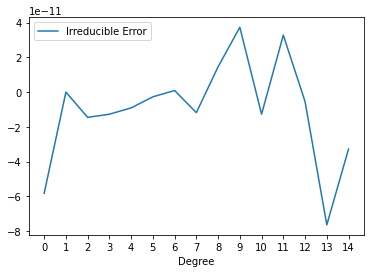

In [11]:
plt.plot(irrError, label="Irreducible Error")
plt.xticks(range(0, 15))
plt.xlabel('Degree')
plt.legend()
plt.show()

### Mean Square Error vs Degree

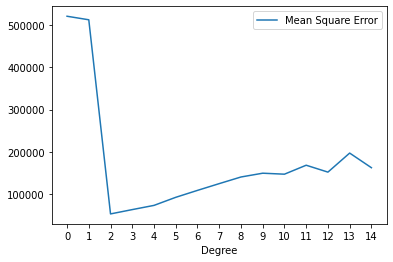

In [12]:
plt.plot(mse, label="Mean Square Error")
plt.xticks(range(0, 15))
plt.xlabel('Degree')
plt.legend()
plt.show()

### $Bias^2$ Vs Variance

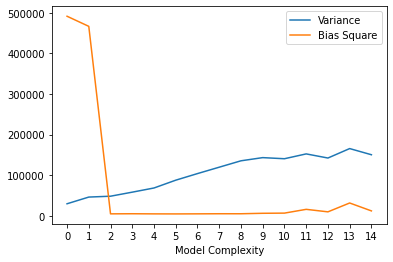

In [13]:
plt.plot(variance, label="Variance")
plt.plot(bias2, label="Bias Square")
plt.xticks(range(0, 15))
plt.xlabel('Model Complexity')
plt.legend()
plt.show()

### Prediction Plots of All Models

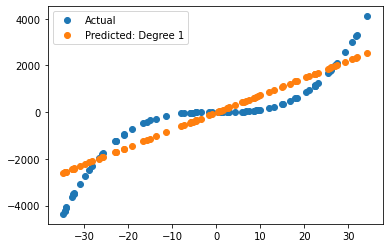

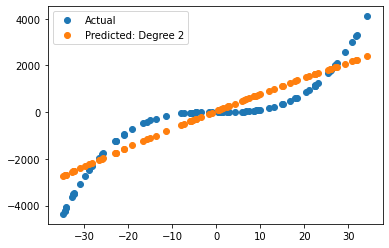

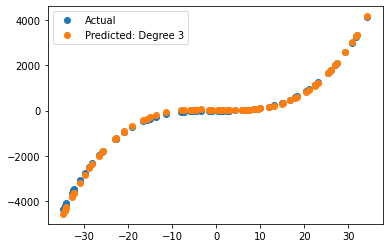

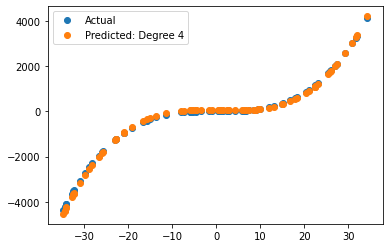

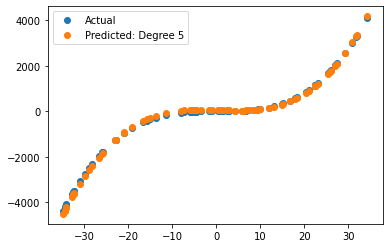

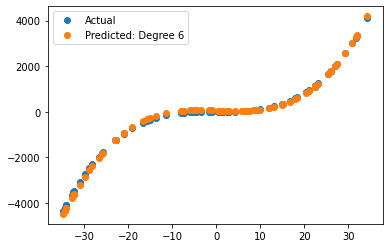

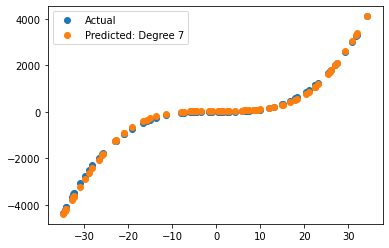

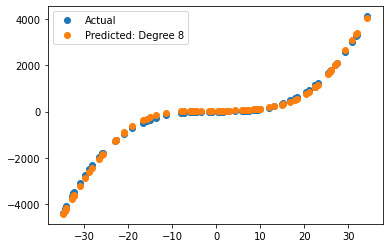

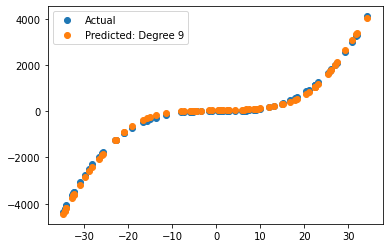

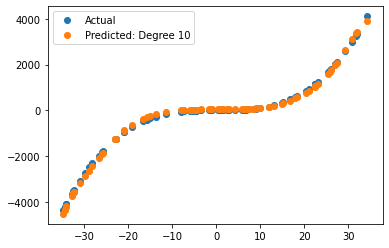

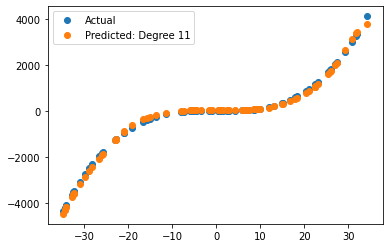

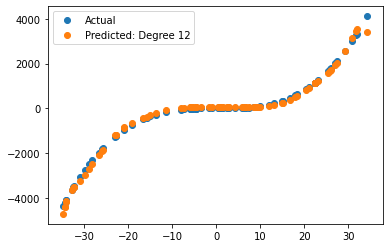

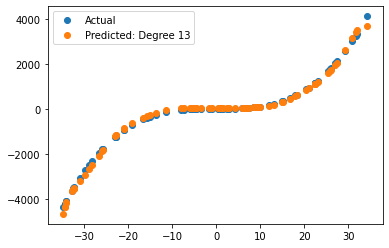

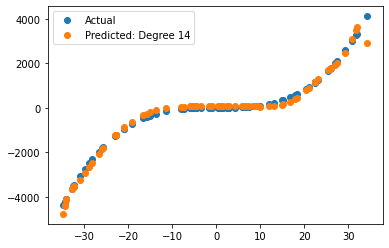

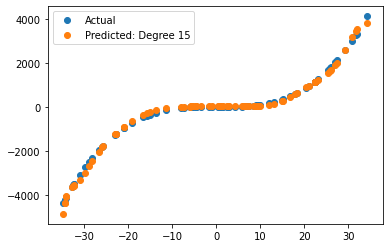

In [14]:
avg_f_1 = np.empty([ntestelements])
avg_f_values = np.empty([15, ntestelements])
for i in range(15):
    avg_f = np.empty([parts, ntestelements])
    for j in range(parts):
        avg_f[j] = AllModels[i, j].predict(PolynomialFeatures(degree=i+1).fit_transform(testdata[:, 0].reshape(ntestelements, 1)))
    avg_f_values[i] = np.mean(avg_f, axis = 0)
    plt.plot(testdata[:, 0], testdata[:, 1], 'o', label='Actual')
    plt.plot(testdata[:, 0], avg_f_values[i], 'o', label='Predicted: Degree ' + str((i+1)))
    plt.legend()
    plt.show()